# Correlation & Dependancy

In [1]:
from verticapy import *

In [2]:
from verticapy.connections import *
new_auto_connection({"host": "34.237.154.116", 
                     "port": "5433", 
                     "database": "testdrive", 
                     "password": "password", 
                     "user": "dbadmin"},
                    name = "VerticaDSN")
# Set the primary auto-connection
change_auto_connection("VerticaDSN")

Finding links between the different variables is a very important task. The main purpose of Data Science is to find which variables will have an impact on the Business. Having these information will help us to understand the data and to take decisions. 

Besides, many Machine Learning Models are sensible to the number of variables and the link between the different variables. Finding variables correlations and dependancies is also a very important task to know which variables to use when dealing with Machine Learning algorithms.

Let's use the Telco Churn dataset to understand how to find links between the different variables in VerticaPy.

In [ ]:
read_csv('churn.csv',
         schema = 'public',
         table_name = 'churn')

,AbccustomerIDVarchar(20),AbcgenderVarchar(20),123SeniorCitizenInt,010PartnerBoolean,010DependentsBoolean,123tenureInt,010PhoneServiceBoolean,AbcMultipleLinesVarchar(100),AbcInternetServiceVarchar(22),AbcOnlineSecurityVarchar(38),AbcOnlineBackupVarchar(38),AbcDeviceProtectionVarchar(38),AbcTechSupportVarchar(38),AbcStreamingTVVarchar(38),AbcStreamingMoviesVarchar(38),AbcContractVarchar(28),010PaperlessBillingBoolean,AbcPaymentMethodVarchar(50),"123MonthlyChargesNumeric(8,3)","123TotalChargesNumeric(9,3)",010ChurnBoolean
1,0014-BMAQU,Male,0,✅,❌,63,✅,Yes,Fiber optic,Yes,No,No,Yes,No,No,Two year,✅,Credit card (automatic),84.65,5377.8,❌
2,0031-PVLZI,Female,0,✅,✅,4,✅,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Month-to-month,❌,Mailed check,20.35,76.35,✅
3,0057-QBUQH,Female,0,❌,✅,43,✅,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,✅,Electronic check,25.1,1070.15,❌
4,0137-OCGAB,Female,0,❌,❌,1,✅,Yes,Fiber optic,No,Yes,No,No,No,No,Month-to-month,✅,Mailed check,80.2,80.2,✅
5,0139-IVFJG,Female,0,✅,❌,2,✅,No,Fiber optic,Yes,Yes,No,No,Yes,No,Month-to-month,❌,Electronic check,90.35,190.5,❌
6,0178-SZBHO,Male,0,✅,✅,47,✅,Yes,Fiber optic,No,Yes,No,No,Yes,No,Month-to-month,❌,Electronic check,87.2,4017.45,❌
7,0208-BPQEJ,Female,0,✅,✅,12,✅,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Month-to-month,❌,Bank transfer (automatic),19.4,198.1,❌
8,0219-YTZUE,Male,0,✅,✅,4,✅,Yes,Fiber optic,No,Yes,Yes,No,No,No,Month-to-month,✅,Bank transfer (automatic),84.8,371.9,✅
9,0220-EBGCE,Male,0,❌,❌,2,✅,No,Fiber optic,No,No,Yes,No,No,Yes,Month-to-month,✅,Electronic check,85.85,167.3,✅
10,0229-LFJAF,Male,0,❌,❌,72,✅,Yes,DSL,Yes,Yes,Yes,Yes,No,No,Two year,❌,Bank transfer (automatic),69.65,4908.25,❌

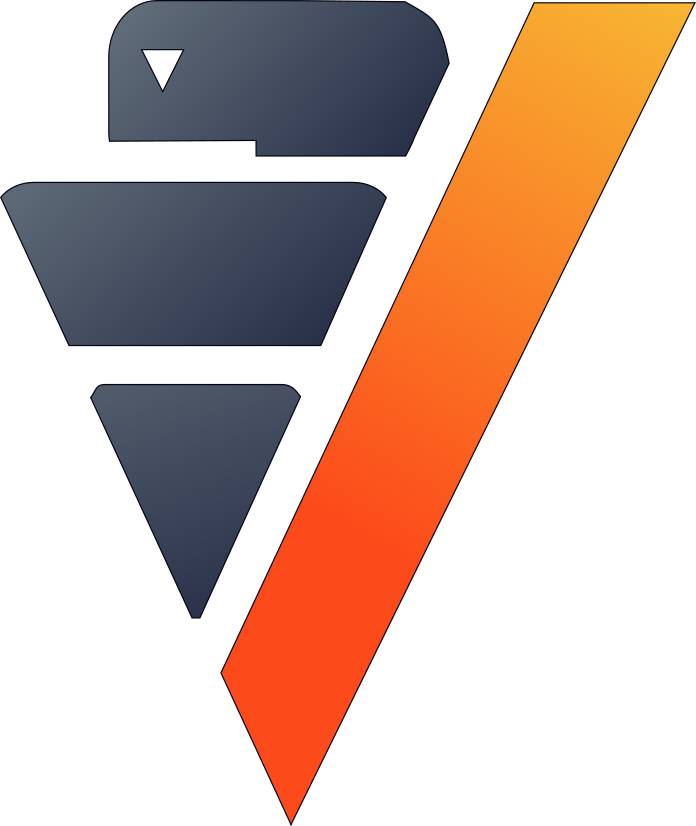

In [3]:
from verticapy import *
vdf = vDataFrame("public.churn")
display(vdf)

Pearson correlation help us to find linear links between the variables. Having a strong Pearson relationship means that the two input variables are linearly correlated. It is the most used correlation function.

,"""SeniorCitizen""","""Partner""","""Dependents""","""tenure""","""PhoneService""","""PaperlessBilling""","""MonthlyCharges""","""TotalCharges""","""Churn"""
"""SeniorCitizen""",1.0,0.0164786575974139,-0.211185088493958,0.0165668776818093,0.00857640107927944,0.156529559311173,0.220173338576271,0.102410605395331,0.150889328176473
"""Partner""",0.0164786575974139,1.0,0.452676282929464,0.379697461168293,0.017705663223972,-0.014876622287891,0.0968479362564754,0.319072363238568,-0.150447544959177
"""Dependents""",-0.211185088493958,0.452676282929464,1.0,0.159712331216918,-0.00176167854468371,-0.111377229193644,-0.113890230021934,0.0646532494217729,-0.164221401579725
"""tenure""",0.0165668776818093,0.379697461168293,0.159712331216918,1.0,0.00844820673274375,0.00615248159827112,0.247899856286152,0.8258804609332,-0.352228670113078
"""PhoneService""",0.00857640107927944,0.017705663223972,-0.00176167854468371,0.00844820673274375,1.0,0.0165048057325697,0.247397963214133,0.113008260954736,0.0119419800290031
"""PaperlessBilling""",0.156529559311173,-0.014876622287891,-0.111377229193644,0.00615248159827112,0.0165048057325697,1.0,0.352149967795987,0.157829782865907,0.191825331666468
"""MonthlyCharges""",0.220173338576271,0.0968479362564754,-0.113890230021934,0.247899856286152,0.247397963214133,0.352149967795987,1.0,0.651064803226201,0.193356422237846
"""TotalCharges""",0.102410605395331,0.319072363238568,0.0646532494217729,0.8258804609332,0.113008260954736,0.157829782865907,0.651064803226201,1.0,-0.199484083567564
"""Churn""",0.150889328176473,-0.150447544959177,-0.164221401579725,-0.352228670113078,0.0119419800290031,0.191825331666468,0.193356422237846,-0.199484083567564,1.0

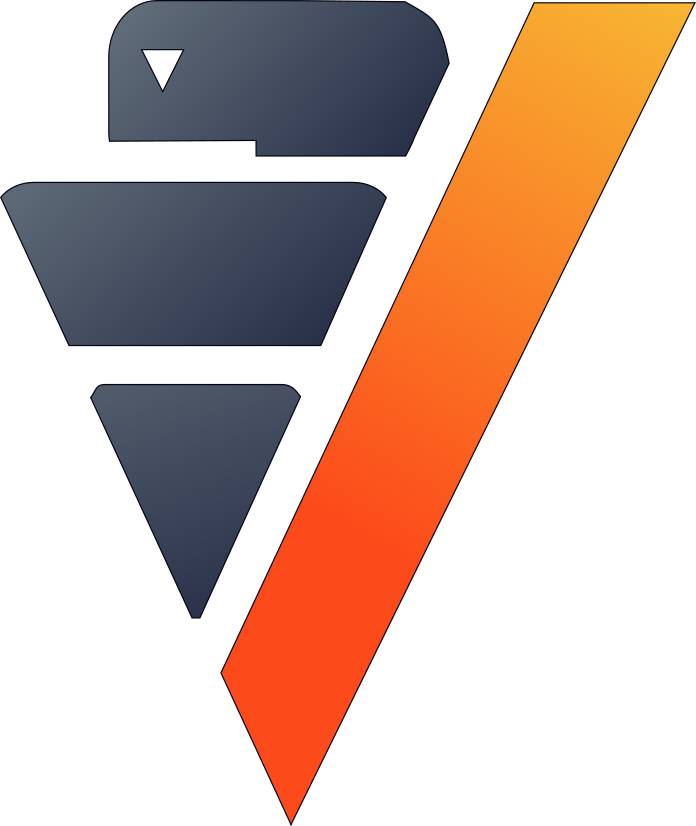

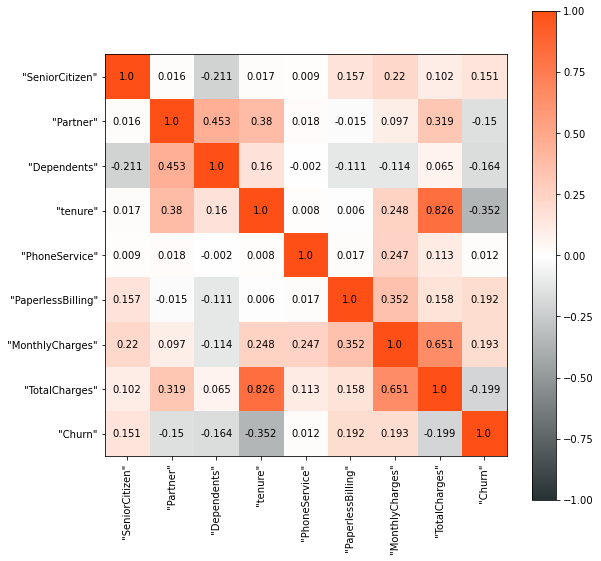

In [4]:
vdf.corr(method = "pearson")

We can notice that the tenure is well correlated to the Total Charges which makes sense.

0.8258804609332

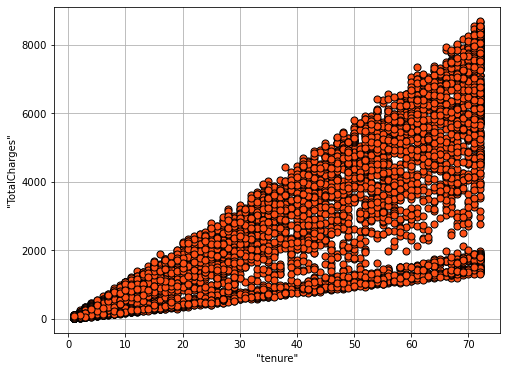

In [5]:
vdf.scatter(["tenure", "TotalCharges"])
vdf.corr(["tenure", "TotalCharges"], method = "pearson")

However, having a low Pearson relationship doesn't mean not being correlated. For example, let's compute the Pearson correlation between the tenure and the Total Charges to the power of 20.

0.224994408804537

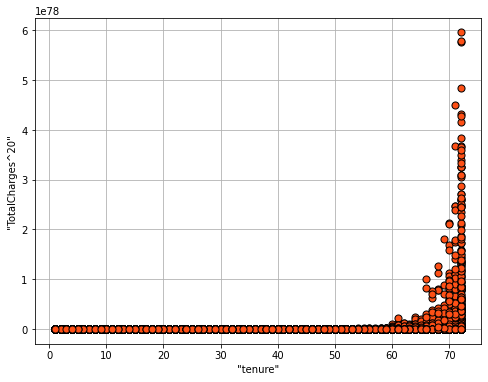

In [6]:
vdf.eval(name = "TotalCharges^20", expr = "POWER(TotalCharges, 20)")
vdf.scatter(["tenure", "TotalCharges^20"])
vdf.corr(["tenure", "TotalCharges^20"], method = "pearson")

We know that the tenure and the Total Charges are highly linearly correlated. However we can notice that the correlation between the tenure and the Total Charges to the power of 20 is not very high. Indeed, Pearson coefficient is not robust to monotonic relationship. Rank based correlations are. That's why sometimes using Spearman correlation is a more suitable choice.

Linear: Variables tend to move in same relative direction and same rate

Monotonic: Variables move in same direction, but not same rate

,"""SeniorCitizen""","""Partner""","""Dependents""","""tenure""","""PhoneService""","""PaperlessBilling""","""MonthlyCharges""","""TotalCharges""","""Churn""","""TotalCharges^20"""
"""SeniorCitizen""",1.0,0.0164786575974139,-0.211185088493958,0.0190767898701152,0.00857640107927944,0.156529559311173,0.221092529102162,0.105795342303725,0.150889328176473,0.105795342303725
"""Partner""",0.0164786575974139,1.0,0.452676282929464,0.384665710284119,0.017705663223972,-0.014876622287891,0.108410945895981,0.343930553215626,-0.150447544959177,0.343930553215626
"""Dependents""",-0.211185088493958,0.452676282929464,1.0,0.164485741353804,-0.00176167854468371,-0.111377229193644,-0.107082725586711,0.0866797760484616,-0.164221401579725,0.0866797760484616
"""tenure""",0.0190767898701152,0.384665710284119,0.164485741353804,1.0,0.00815081986907184,0.00792876239476321,0.276342245223708,0.883103368818293,-0.369620778763435,0.883103368818293
"""PhoneService""",0.00857640107927944,0.017705663223972,-0.00176167854468371,0.00815081986907184,1.0,0.0165048057325697,0.238826410230016,0.0838048547856037,0.0119419800290031,0.0838048547856037
"""PaperlessBilling""",0.156529559311173,-0.014876622287891,-0.111377229193644,0.00792876239476321,0.0165048057325697,1.0,0.346158879381323,0.151669712799097,0.191825331666468,0.151669712799097
"""MonthlyCharges""",0.221092529102162,0.108410945895981,-0.107082725586711,0.276342245223708,0.238826410230016,0.346158879381323,1.0,0.633958405301206,0.184839285783758,0.633958405301206
"""TotalCharges""",0.105795342303725,0.343930553215626,0.0866797760484616,0.883103368818293,0.0838048547856037,0.151669712799097,0.633958405301206,1.0,-0.233211018585104,1.0
"""Churn""",0.150889328176473,-0.150447544959177,-0.164221401579725,-0.369620778763435,0.0119419800290031,0.191825331666468,0.184839285783758,-0.233211018585104,1.0,-0.233211018585104
"""TotalCharges^20""",0.105795342303725,0.343930553215626,0.0866797760484616,0.883103368818293,0.0838048547856037,0.151669712799097,0.633958405301206,1.0,-0.233211018585104,1.0

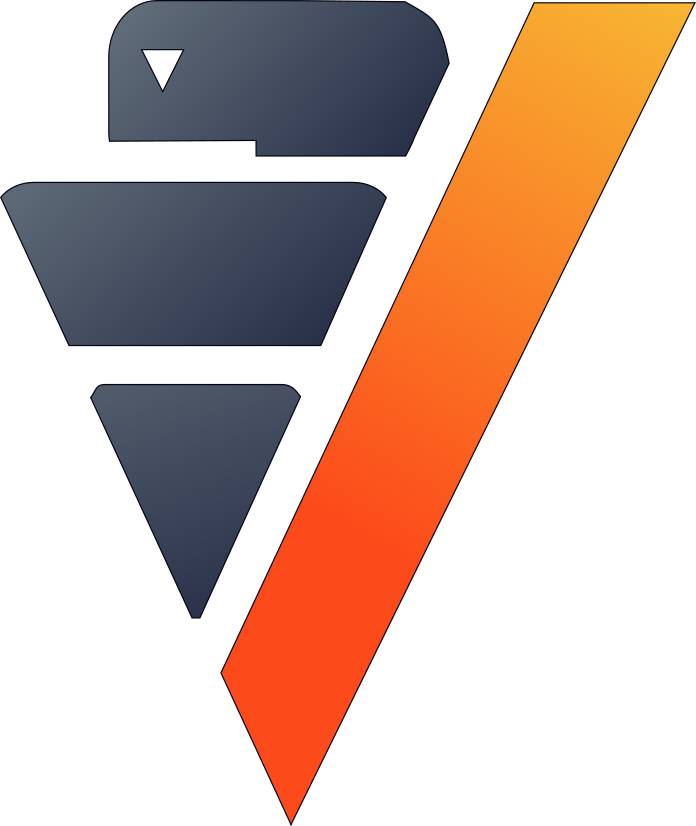

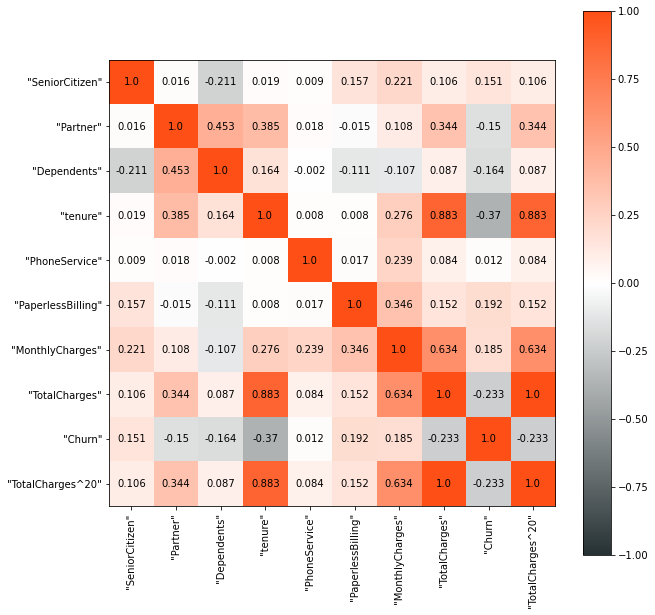

In [7]:
vdf.corr(method = "spearman")

Spearman coefficient determines the monotonic relationships between the variables.

In [8]:
vdf.corr(["tenure", "TotalCharges^20"], method = "spearman")

0.883103368818293

We can notice that Spearman coefficient stays the same if one of the variable can be expressed using a monotonic function on the other. The same applies to Kendall coefficient. 

,"""SeniorCitizen""","""Partner""","""Dependents""","""tenure""","""PhoneService""","""PaperlessBilling""","""MonthlyCharges""","""TotalCharges""","""Churn""","""TotalCharges^20"""
"""SeniorCitizen""",1,0.0164786575974139,-0.211185088493958,0.0153154063543276,0.00857640107927944,0.156529559311173,0.180635949216048,0.0873571166085645,0.150889328176473,0.0873571166085645
"""Partner""",0.0164786575974139,1,0.452676282929464,0.317713503646956,0.017705663223972,-0.014876622287891,0.0886260353369454,0.279358144937778,-0.150447544959177,0.279358144937778
"""Dependents""",-0.211185088493958,0.452676282929464,1,0.135506499930892,-0.00176167854468371,-0.111377229193644,-0.0874394375642774,0.0674036111339054,-0.164221401579725,0.0674036111339054
"""tenure""",0.0153154063543276,0.317713503646956,0.135506499930892,1,0.00700180312561143,0.0063514568219607,0.190564868116964,0.731699318287362,-0.302965018211126,0.731699318287362
"""PhoneService""",0.00857640107927944,0.017705663223972,-0.00176167854468371,0.00700180312561143,1,0.0165048057325697,0.195862538105968,0.0690761344143585,0.0119419800290031,0.0690761344143585
"""PaperlessBilling""",0.156529559311173,-0.014876622287891,-0.111377229193644,0.0063514568219607,0.0165048057325697,1,0.28271562697138,0.12528100183927,0.191825331666468,0.12528100183927
"""MonthlyCharges""",0.180635949216048,0.0886260353369454,-0.0874394375642774,0.190564868116964,0.195862538105968,0.28271562697138,1,0.458469198925234,0.150955285158245,0.458469198925234
"""TotalCharges""",0.0873571166085645,0.279358144937778,0.0674036111339054,0.731699318287362,0.0690761344143585,0.12528100183927,0.458469198925234,1,-0.189101699239313,0.996878225678041
"""Churn""",0.150889328176473,-0.150447544959177,-0.164221401579725,-0.302965018211126,0.0119419800290031,0.191825331666468,0.150955285158245,-0.189101699239313,1,-0.189101699239313
"""TotalCharges^20""",0.0873571166085645,0.279358144937778,0.0674036111339054,0.731699318287362,0.0690761344143585,0.12528100183927,0.458469198925234,0.996878225678041,-0.189101699239313,1

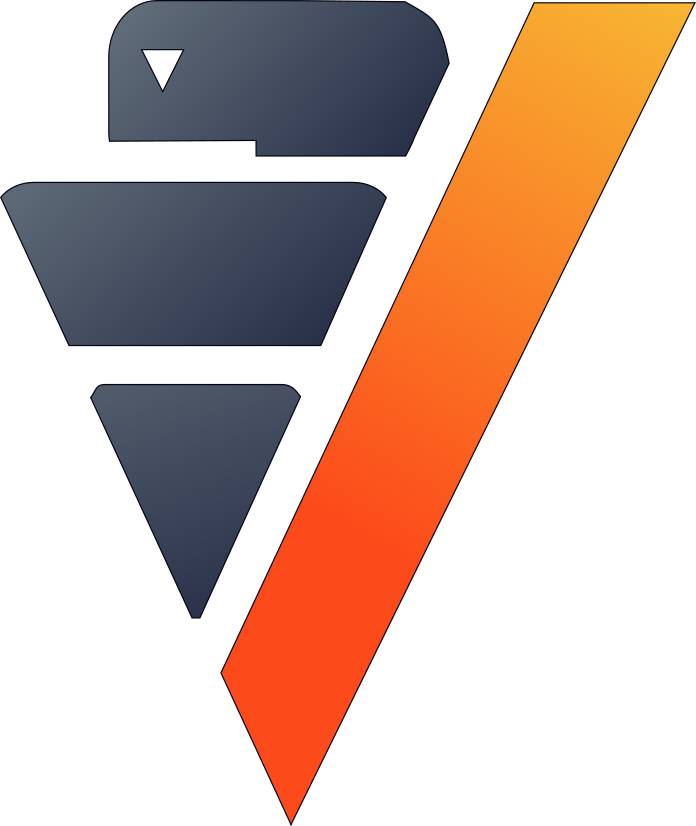

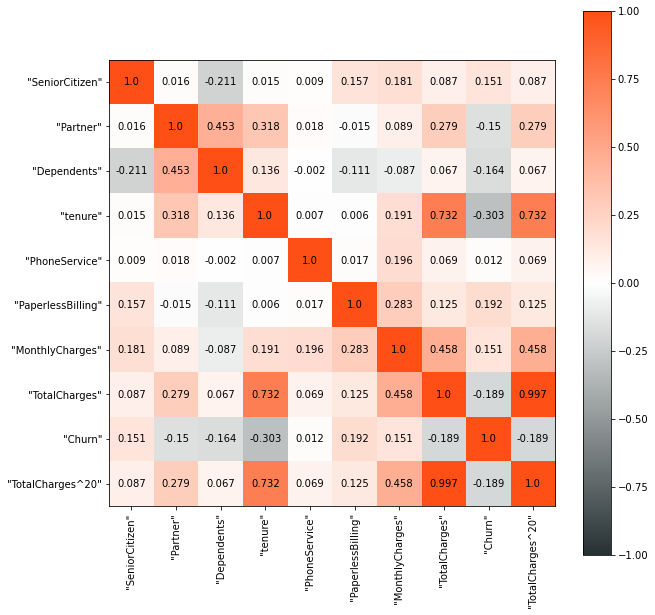

In [9]:
vdf.corr(method = "kendall")

We can notice that Kendall will also detect the monotonic relationship.

In [ ]:
vdf.corr(["tenure", "TotalCharges^20"], method = "kendall")

However Kendall is very expensive to compute. That's why most of the time, we will use Pearson and Spearman when dealing with numerical variables correlations. 

Binary features are considered as numerical but it is not truly the case. Correlation between a binary variable and a numerical variable can lead to false assumptions as binary variables can only takes two values which is hard to interpret in terms of order. That's why in this case, it is preferable to use the 'Biserial Point' method. It is a powerful method to understand the link between a binary variable and a numerical variable.

,"""SeniorCitizen""","""Partner""","""Dependents""","""tenure""","""PhoneService""","""PaperlessBilling""","""MonthlyCharges""","""TotalCharges""","""Churn""","""TotalCharges^20"""
"""SeniorCitizen""",1,0.0164774876952011,-0.211170095409668,0.0165657015164121,0.0085757921977281,0.156518446495901,0.220157707371214,0.102403323381215,0.150878615789382,0.00959483426594477
"""Partner""",0.0164774876952011,1,0.452644145179047,0.379670504548958,0.017704406210501,-0.014875566122167,0.09684106053773,0.319049675261633,-0.150436863936483,0.0945722425175577
"""Dependents""",-0.211170095409668,0.452644145179047,1,0.159700992440771,-0.0017615534743243,-0.111369321967821,-0.113882144385631,0.0646486521842783,-0.164209742682151,0.0224428704447468
"""tenure""",0.0165657015164121,0.379670504548958,0.159700992440771,1,nan,nan,nan,nan,nan,nan
"""PhoneService""",0.0085757921977281,0.017704406210501,-0.0017615534743243,nan,1,0.0165036339739701,0.247380399196989,0.113000225383144,0.0119411322081913,0.0467146740346801
"""PaperlessBilling""",0.156518446495901,-0.014875566122167,-0.111369321967821,nan,0.0165036339739701,1,0.352124966910804,0.157818560212722,0.191811713028016,0.0579931118233683
"""MonthlyCharges""",0.220157707371214,0.09684106053773,-0.113882144385631,nan,0.247380399196989,0.352124966910804,1,nan,0.193342694899628,nan
"""TotalCharges""",0.102403323381215,0.319049675261633,0.0646486521842783,nan,0.113000225383144,0.157818560212722,nan,1,-0.199469899041392,nan
"""Churn""",0.150878615789382,-0.150436863936483,-0.164209742682151,nan,0.0119411322081913,0.191811713028016,0.193342694899628,-0.199469899041392,1,-0.0630928693846116
"""TotalCharges^20""",0.00959483426594477,0.0945722425175577,0.0224428704447468,nan,0.0467146740346801,0.0579931118233683,nan,nan,-0.0630928693846116,1

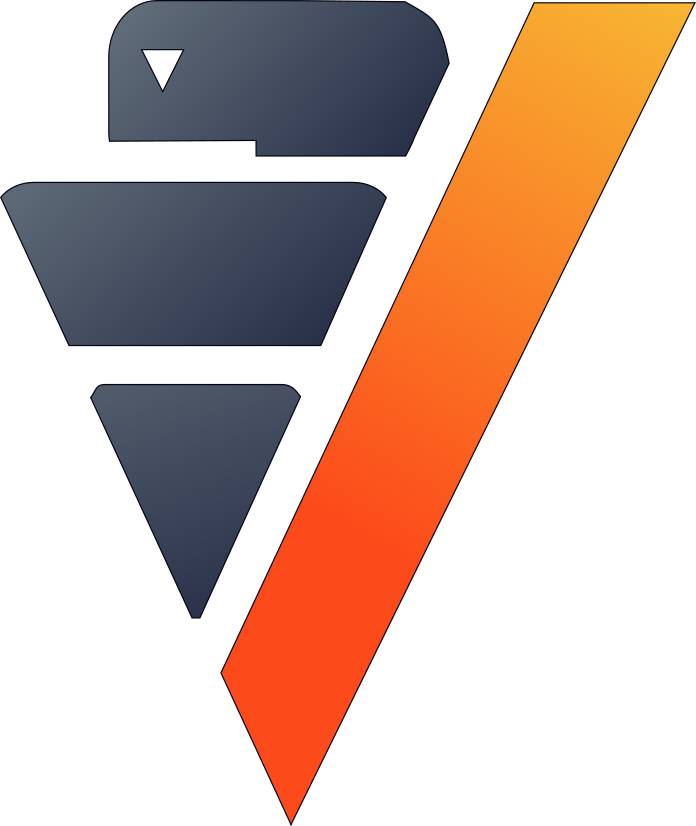

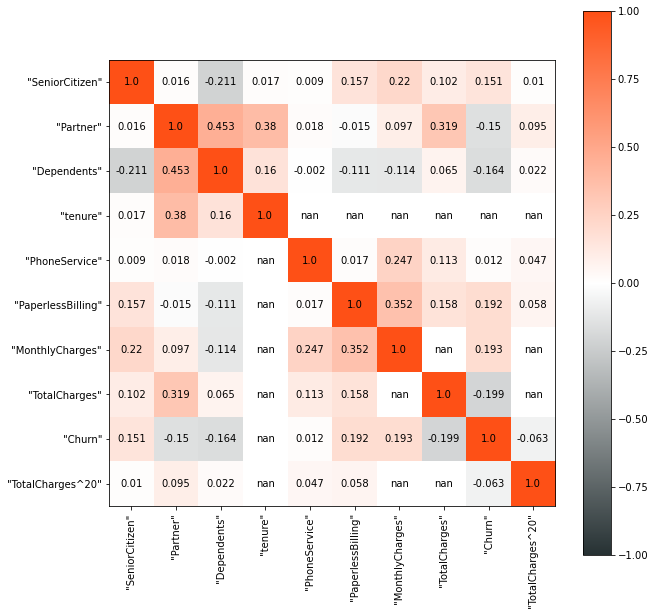

In [10]:
vdf.corr(method = "biserial")

The last important relationship is the one between categorical columns. In this case, the 'Cramer's V' method is very efficient. As there is no position in the Euclidian space for those variables, the 'Cramer's V' coefficients can not be negative (sign of an opposite relationship) and they will range in the interval [0;1].

,"""customerID""","""gender""","""SeniorCitizen""","""Partner""","""Dependents""","""PhoneService""","""MultipleLines""","""InternetService""","""OnlineSecurity""","""OnlineBackup""","""DeviceProtection""","""TechSupport""","""StreamingTV""","""StreamingMovies""","""Contract""","""PaperlessBilling""","""PaymentMethod""","""Churn"""
"""customerID""",1,0.7071387759872941,0.8533988239339025,0.7075137962272524,0.7617937674788702,0.9083424868747245,0.8423185423961393,0.8241182589052664,0.8293968523170167,0.824052991235141,0.8241100151107151,0.8289549641545605,0.822756376161546,0.8227324857138872,0.8379652208984673,0.7190332195604549,0.8679291439283205,0.7810906445878953
"""gender""",0.7071387759872941,1,0.001873711638260736,0.001808079661789021,0.010516611922734077,0.006487672136208199,0.009451666570452976,0.011319816023820888,0.0170248673996952,0.013798357377745577,0.0060292442384310314,0.009722241217455355,0.008844328042668036,0.010640764864840464,0.008152557349604891,0.011753691221222193,0.01864584107758851,0.008612095078997812
"""SeniorCitizen""",0.8533988239339025,0.001873711638260736,1,0.016478657597413914,0.21118508849395765,0.008576401079279436,0.1466428981547604,0.26532401247490706,0.21107026551439387,0.18277371600205183,0.18307117871498424,0.22405049807030314,0.18558579209841322,0.18896193131088726,0.1438683664984389,0.15652955931117277,0.19598451589487909,0.1508893281764731
"""Partner""",0.7075137962272524,0.001808079661789021,0.016478657597413914,1,0.4526762829294638,0.017705663223972032,0.14389768511332032,0.0009073521208289714,0.1520098144303294,0.15333685221744686,0.16656826190673807,0.12764156082912625,0.13734265561456047,0.1295738983957767,0.29603947593743685,0.01487662228789104,0.16276227893705197,0.15044754495917656
"""Dependents""",0.7617937674788702,0.010516611922734077,0.21118508849395765,0.4526762829294638,1,0.0017616785446837105,0.025094016713979587,0.1802672478825538,0.19457924376849997,0.1627601413923546,0.15757010710298983,0.1823774404156106,0.14708243957321443,0.1413353739608838,0.24421223608441336,0.11137722919364426,0.15074411049283012,0.16422140157972528
"""PhoneService""",0.9083424868747245,0.006487672136208199,0.008576401079279436,0.017705663223972032,0.0017616785446837105,1,0.9083424868747245,0.3756877098193481,0.1004543340659466,0.09426132351692645,0.0933403708615453,0.10168502026979014,0.1075905732294665,0.10262843139014985,0.003976117347714681,0.01650480573256966,0.010297221766590077,0.01194198002900308
"""MultipleLines""",0.8423185423961393,0.009451666570452976,0.1466428981547604,0.14389768511332032,0.025094016713979587,0.9083424868747245,1,0.35442564054609377,0.20549824502887423,0.22274250160703957,0.22404038042422336,0.20611678556080693,0.24092390664877442,0.24153764189544388,0.08040766226914967,0.16634063233977742,0.1669298080382473,0.04010925283378872
"""InternetService""",0.8241182589052664,0.011319816023820888,0.26532401247490706,0.0009073521208289714,0.1802672478825538,0.3756877098193481,0.35442564054609377,1,0.5959261119397458,0.5747918951855748,0.5746979259753913,0.5940263647919771,0.5869475572452835,0.5856137246362116,0.20692091402897067,0.3784273654205174,0.3131230023778106,0.32245455521230887
"""OnlineSecurity""",0.8293968523170167,0.0170248673996952,0.21107026551439387,0.1520098144303294,0.19457924376849997,0.1004543340659466,0.20549824502887423,0.5959261119397458,1,0.5885783134226351,0.587182704257195,0.6063578188342443,0.575535268964284,0.5760517524952443,0.30134873250567035,0.34179975542511276,0.30495874601380435,0.3474004326740551
"""OnlineBackup""",0.824052991235141,0.013798357377745577,0.18277371600205183,0.15333685221744686,0.1627601413923546,0.09426132351692645,0.22274250160703957,0.5747918951855748,0.5885783134226351,1,0.5894213880027672,0.5902863075237831,0.5840131835568888,0.5827676397944742,0.2585717875284732,0.3210458207980537,0.282516640706162,0.2923155121954445

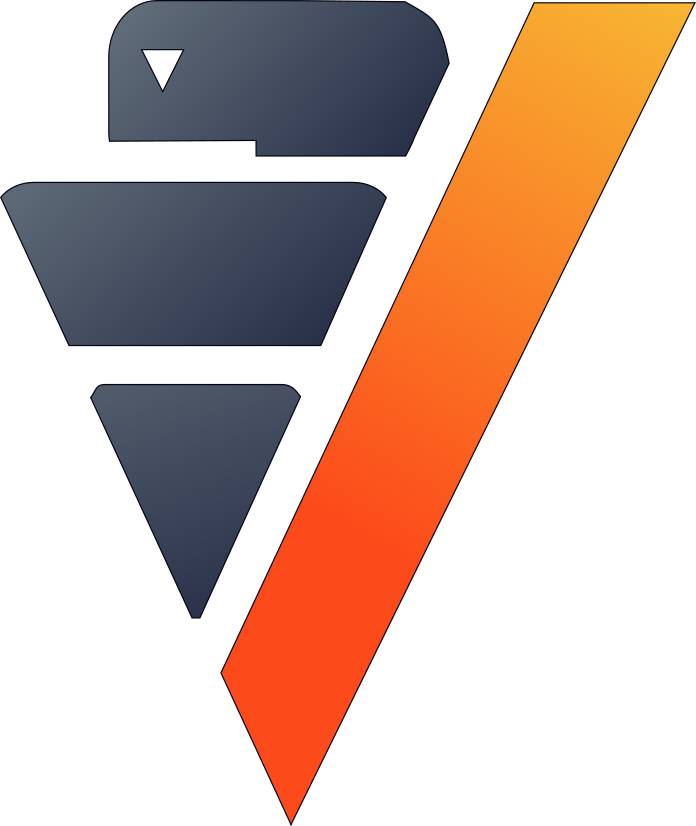

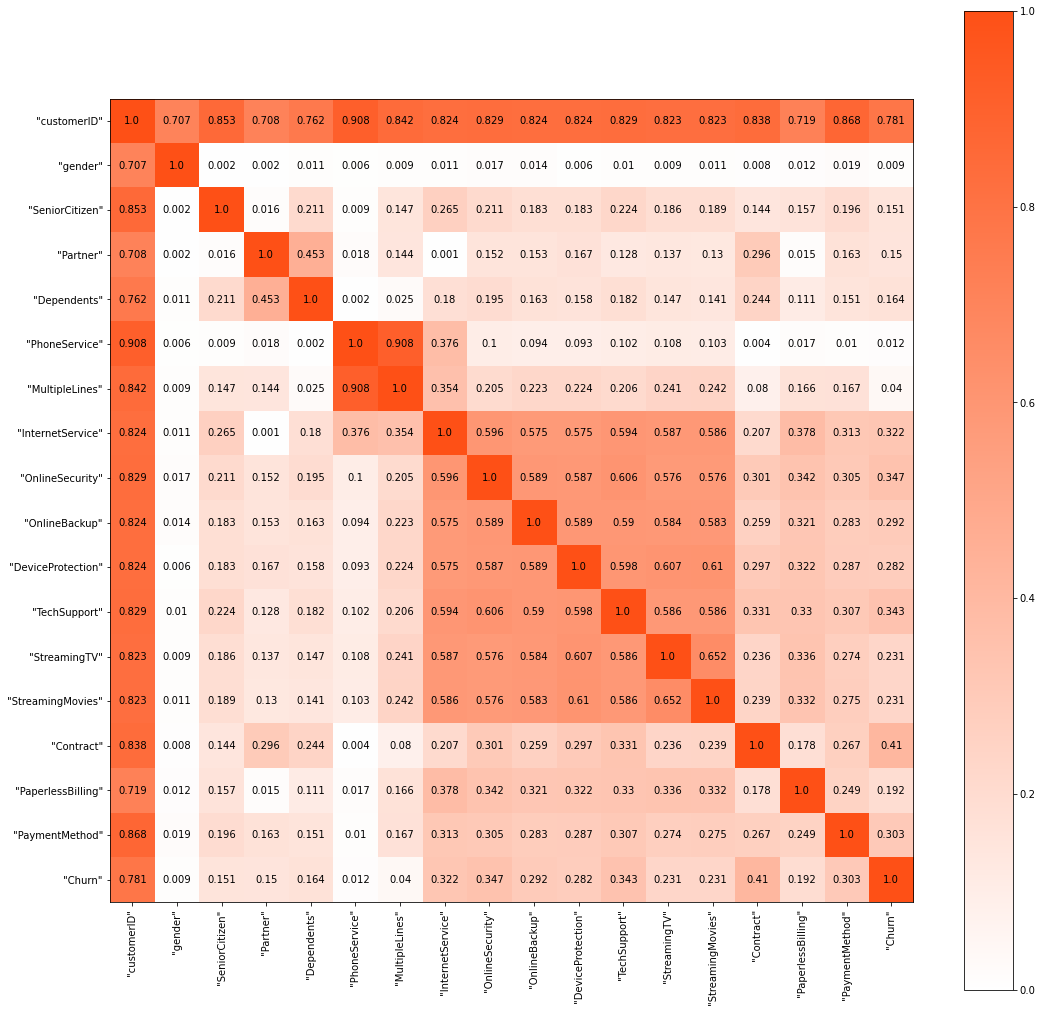

In [11]:
vdf.corr(method = "cramer")

Sometimes, we just need to look at the correlation between a response and other variables. The parameter 'focus' will show us only the needed correlation vector.

,"""Churn"""
"""Churn""",1
"""customerID""",0.7810906445878953
"""Contract""",0.4101156965761409
"""OnlineSecurity""",0.3474004326740551
"""TechSupport""",0.3429161982469257
"""InternetService""",0.32245455521230887
"""PaymentMethod""",0.3033586255540706
"""OnlineBackup""",0.2923155121954445
"""DeviceProtection""",0.281579732968073
"""StreamingMovies""",0.230950809069268

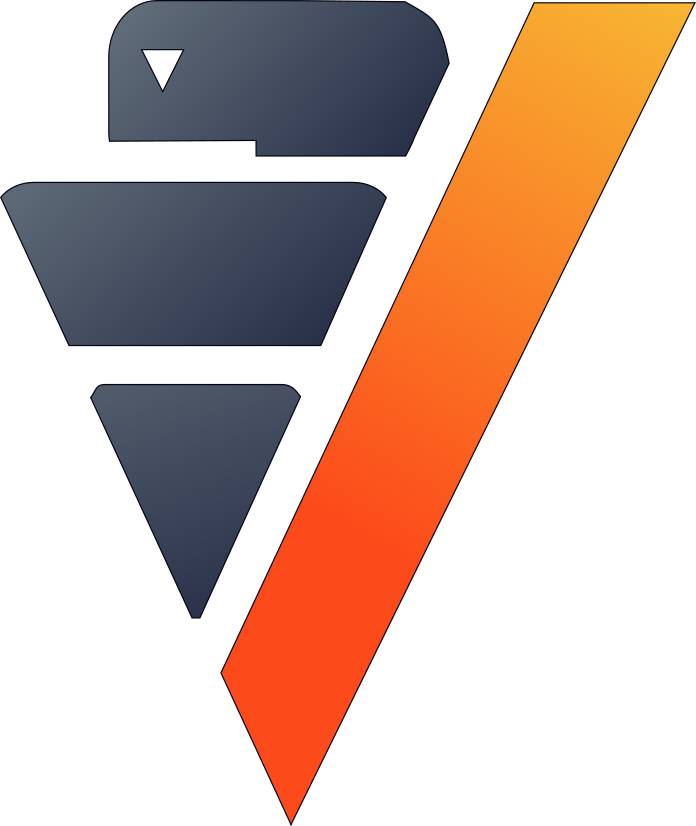

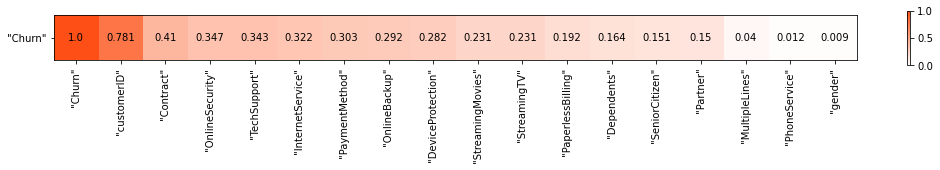

In [12]:
vdf.corr(method = "cramer", focus = "Churn")

We can see that the Churn is correlated to the type of contract (Month-to-Month, Year-to-Year...) which makes sense as the different types of contracts can give more or less flexibility to the user to churn. The internet service seems also to be correlated to the churn. Let's split the different categories to binaries to understand which services can influence the global churning.

,"""Churn"""
"""InternetService_Fiber_optic""",0.308
"""InternetService_DSL""",-0.124

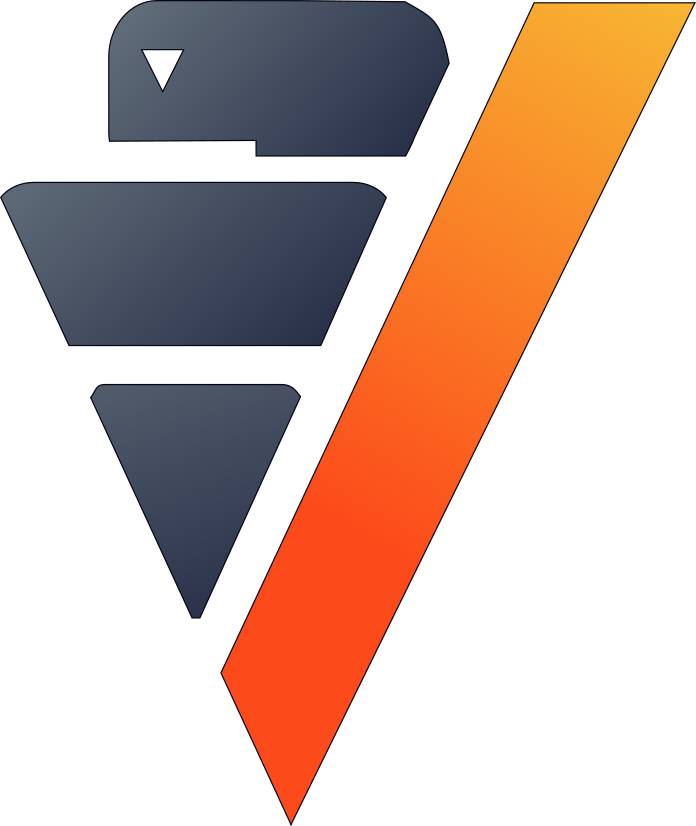

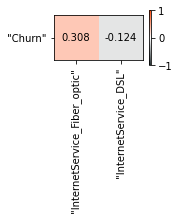

In [13]:
vdf["InternetService"].get_dummies()
vdf.corr(method = "spearman", 
         focus = "Churn", 
         columns = ["InternetService_DSL", 
                    "InternetService_Fiber_optic"])

We can notice that the Fiber Optic option seems to be directly linked to the customers churn. Let's compute some aggregations to understand where is the causality.

,123InternetService_Fiber_opticInt,123tenureFloat,123totalchargesFloat,123contract_month-to-month2Float,123monthlycharges2Float
1,0,31.9422346085635,1558.06548526423,0.442614644033443,43.7882442361287
2,1,32.9179586563307,3205.30457041344,0.68733850129199,91.5001291989664

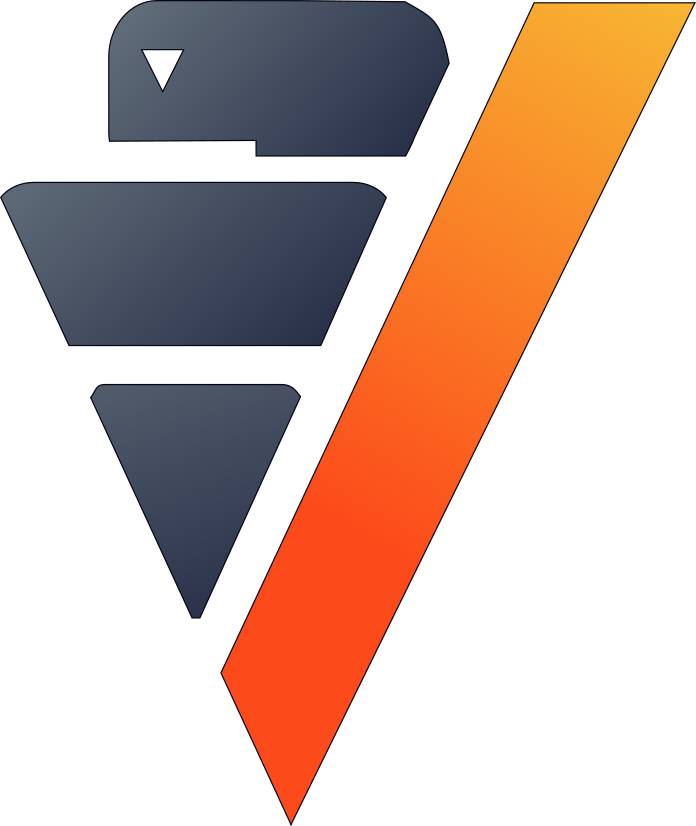

In [14]:
vdf["contract"].get_dummies()
vdf.groupby(["InternetService_Fiber_optic"], 
            ["AVG(tenure) AS tenure", 
             "AVG(totalcharges) AS totalcharges",
             'AVG("contract_month-to-month") AS "contract_month-to-month2"',
             'AVG("monthlycharges") AS "monthlycharges2"'])

It seems that users having the Fiber Optic Options tend more to churn not because of the option itself but probably because of the type of contracts and the monthly charges the users are paying to get it. Be careful when dealing with correlation as finding correlation doesn't mean finding causations !

It is mathematically impossible to build the perfect correlation function. However, we can find many different links between the variables.

Now we know how to explore our data. In the next chapter we will see how to enrich and build our final dataset using joins.